# Análise exploratória de ponta parte 2

Agora, vamos pensar como se estivéssemos trabalhando!<br> Em uma empresa, começariámos o dia com a demanda do gestor, mas é importante que perguntar para ele o objetivo da análise e informações adicionais.

Nessa parte iremos aprender como mostrar nossas análises, como criar readme para os projetos e se destacar no mercado.

# Introdução

Neste estudo, nossa meta é mergulhar fundo nas relações que existem entre as características físicas de um imóvel, como metragem e número de cômodos, com seu preço e localização. A ideia é entender, principalmente, o que está por trás dos preços dos imóveis de São Paulo, uma das metrópoles mais agitadas e desafiadoras do Brasil. Os dados aqui analisados foram baixados na plataforma do Kaggle, bastante popular por suas competições de Machine Learning, e foram originadas de uma raspagem realizada no site do Quinto Andar, em março de 2023.

A análise aqui apresentada discute as variáveis citadas acima e explora o quanto, e como, elas influenciam tanto o preço de aluguel quanto o preço total de um imóvel, com encargos adicionais (não especificados no Kaggle). Buscaremos entender, por exemplo, como a localização de um imóvel em determinado bairro pode impactar seu preço de aluguel. Além disso, investigaremos a relevância de outras características físicas do imóvel, como o tamanho em metros quadrados, a quantidade de banheiros e quartos, entre outros, na determinação de seu valor total de venda ou aluguel. Também vamos identificar os bairros mais caros e mais baratos da cidade.

Este estudo foi feito apenas com o intuito de aprendizado, já que não sabemos se o dataset está enviesado de qualquer forma, com algum tipo de lacuna ou mesmo erros, já que não temos nenhum processo de validação.

Então, seja bem-vindo à nossa jornada exploratória pelo mercado imobiliário de São Paulo!

---

Link para o dataset: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

Definição das colunas da tabela:
- Endereço: O endereço do imóvel
- Bairro: O bairro onde o imóvel está localizado
- Área: A área do imóvel em metros quadrados
- Quartos: O número de quartos no imóvel
- Garagem: O número de vagas de estacionamento disponíveis no imóvel
- Aluguel: O aluguel mensal do imóvel
- Tipo: O tipo do imóvel (apartamento, casa, etc.)
- Total: O custo total do imóvel, incluindo aluguel, impostos e outras taxas.

# Importando bibliotecas

In [1]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Configurar o estilo de gráfico
plt.style.use('ggplot')

# Configurar para exibir até 15 linhas
pd.set_option("display.max_rows", 15)

# Configurar para mostrar todas as colunas
pd.set_option("display.max_columns", None)

- **pd.set_option()** serve para configurar o Pandas. No nosso caso, optamos por mostrar 15 linhas (display rows = exibir linhas) Essa linha configura o pandas para mostrar no máximo 15 linhas quando exibir DataFrames e por exibir todas as colunas possíveis (display columns = exibir colunas).

# Importando o Dataset

In [2]:
aptos = pd.read_csv("data.csv")
aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [3]:
print(f"O Dataframe possui {aptos.shape[0]} linhas e {aptos.shape[1]} colunas.")

O Dataframe possui 11657 linhas e 8 colunas.


In [4]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


Não temos nenhum campo nulo e uma amostra de tamanho razoável, tanto para criarmos boas inferências a respeito do padrão dos imóveis, quanto se quisermos, futuramente, criar modelos preditivos.

In [5]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = aptos.select_dtypes(include=numerics)
categoricas = aptos.select_dtypes(exclude=numerics)

print(f"Temos {numericas.shape[1]} colunas numéricas e {categoricas.shape[1]} colunas categóricas")

Temos 5 colunas numéricas e 3 colunas categóricas


- **.select_dtypes(include=None, exclude=None):** Retorna um subconjunto das colunas do DataFrame com base nos dtypes de coluna.

# Explorando os dados

Eu sempre indico a mesma coisa, análise univariada, seguida da bivariada e, se necessário, avançar para a multivariada. É importante começar pela análise univariada, mesmo que ela não gere insights para responder às questões que levantamos no início do material, pois a análise univariada pode apontar alguma inconsistência nos dados, além de deixar você mais por dentro do perfil do público que está em análise.

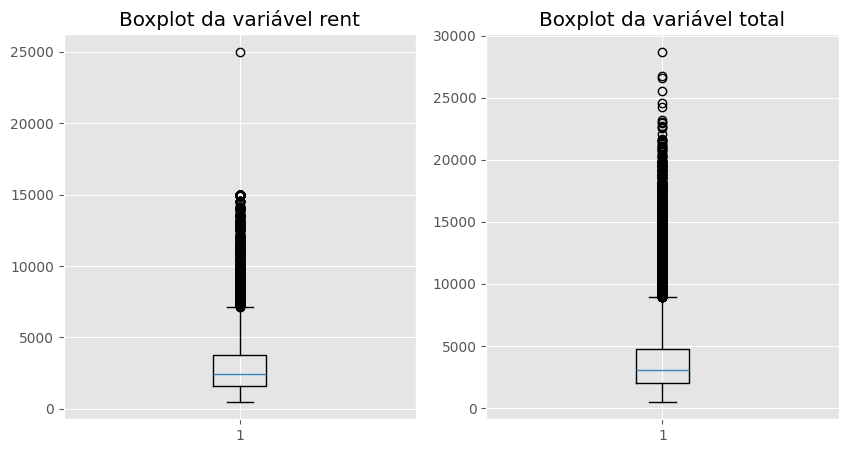

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].boxplot(aptos['rent'])
ax[0].set_title('Boxplot da variável rent')

ax[1].boxplot(aptos['total'])
ax[1].set_title('Boxplot da variável total')

plt.show()

Podemos melhorar o código:

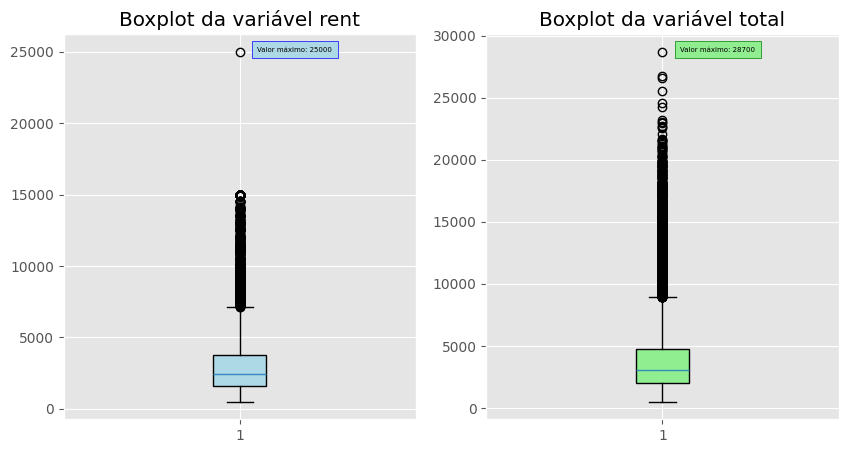

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

bp1 = ax[0].boxplot(aptos['rent'], patch_artist=True)
ax[0].set_title('Boxplot da variável rent')

# Define a cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adiciona legenda do valor máximo
max_rent = np.max(aptos['rent'])
ax[0].annotate(f'Valor máximo: {max_rent}',
                xy = (1, max_rent),
                xytext = (1.05, max_rent),
                bbox = dict(facecolor='lightblue', edgecolor='blue'), 
                fontsize=5)
                
bp2 = ax[1].boxplot(aptos['total'], patch_artist=True)
ax[1].set_title('Boxplot da variável total')

# Define a cor do boxplot
bp2['boxes'][0].set_facecolor('lightgreen')

# Adiciona legenda do valor máximo
max_total = np.max(aptos['total'])
ax[1].annotate(f'Valor máximo: {max_total}',
                xy = (1, max_total),
                xytext = (1.05, max_total),
                bbox = dict(facecolor='lightgreen', edgecolor='green'),
                fontsize=5)

plt.show()

## Explicação do código

### Boxplot

- **`patch_artist=True`**: Permite personalizar as cores das caixas


### Título do primeiro
- **Parâmetros adicionais**: `fontsize=`, `color=`, `fontweight=`, `pad=`, `loc='center'/'left'/'right'`

### Colorindo o boxplot
- **`bp1['boxes']`**: Acessa as caixas do boxplot (retorna uma lista)
- **`[0]`**: Primeira (e única) caixa
- **`.set_facecolor()`**: Define a cor de preenchimento

### Encontrando o valor máximo
```python
max_rent = np.max(aptos['rent'])
```
- **`np.max()`**: Função NumPy que retorna o valor máximo
- **Alternativas**: `aptos['rent'].max()`, `max(aptos['rent'])`

### Anotação no gráfico
```python
ax[0].annotate(f'Valor máximo: {max_rent}',
                xy = (1, max_rent),
                xytext = (1.05, max_rent),
                bbox = dict(facecolor='lightblue', edgecolor='blue'), 
                fontsize=5)
```
- **`.annotate()`**: Adiciona uma anotação com seta
- **`f'Valor máximo: {max_rent}'`**: Texto da anotação (f-string)
- **`xy=(1, max_rent)`**: Coordenadas do ponto a ser anotado
- **`xytext=(1.05, max_rent)`**: Posição do texto da anotação
- **`bbox=dict()`**: Caixa ao redor do texto
  - **`facecolor`**: Cor de fundo da caixa
  - **`edgecolor`**: Cor da borda da caixa
- **`fontsize=5`**: Tamanho da fonte

#### Parâmetros adicionais do annotate() 
- `arrowprops=dict()`: Propriedades da seta
- `ha='center'/'left'/'right'`: Alinhamento horizontal
- `va='top'/'bottom'/'center'`: Alinhamento vertical
- `rotation=`: Rotação do texto
- `color=`: Cor do texto

### Parâmetros adicionais úteis para boxplot():
- **`notch=True`**: Cria "entalhes" na caixa
- **`bootstrap=1000`**: Número de amostras bootstrap para os entalhes
- **`usermedians=[]`**: Valores customizados para as medianas
- **`conf_intervals=[]`**: Intervalos de confiança customizados
- **`showbox=False`**: Oculta as caixas
- **`showcaps=False`**: Oculta as extremidades
- **`showmeans=True`**: Mostra a média
- **`meanline=True`**: Mostra a média como linha ao invés de ponto

Abaixo, concluímos o que observamos e adicionamos mais um gráfico, apenas para facilitar a vida do eleitor que pode preferir ler histogramas:

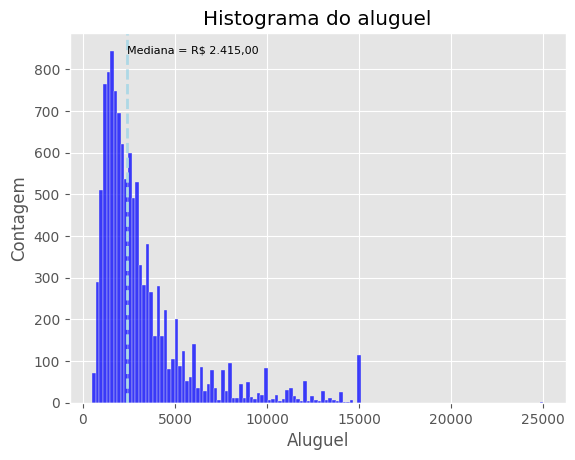

In [8]:
# Calcula a mediana de rent
median_rent = aptos.rent.median()

# Formatando a mediana para 'R$ X,XX'
median_rent_format = ("R$ {:,.2f}".format(median_rent).replace(',', 'v').replace('.', ',').replace('v', '.'))

sns.histplot(aptos.rent, color='blue')
plt.axvline(median_rent, color='lightblue', linestyle='dashed', linewidth=2)
plt.title('Histograma do aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Contagem')
plt.text(x=aptos.rent.median(), y=840, s=f'Mediana = {median_rent_format}', fontsize=8)

plt.show()

Ficou legal, mas eu queria usar um pouco mais do Plotly, que não tem uma curva tão rápida, mas é uma biblioteca de visualização de dados muito mais interessante, capaz de criar gráficos bem bonitos. Vamos trocar o histograma acima por um no Plotly:

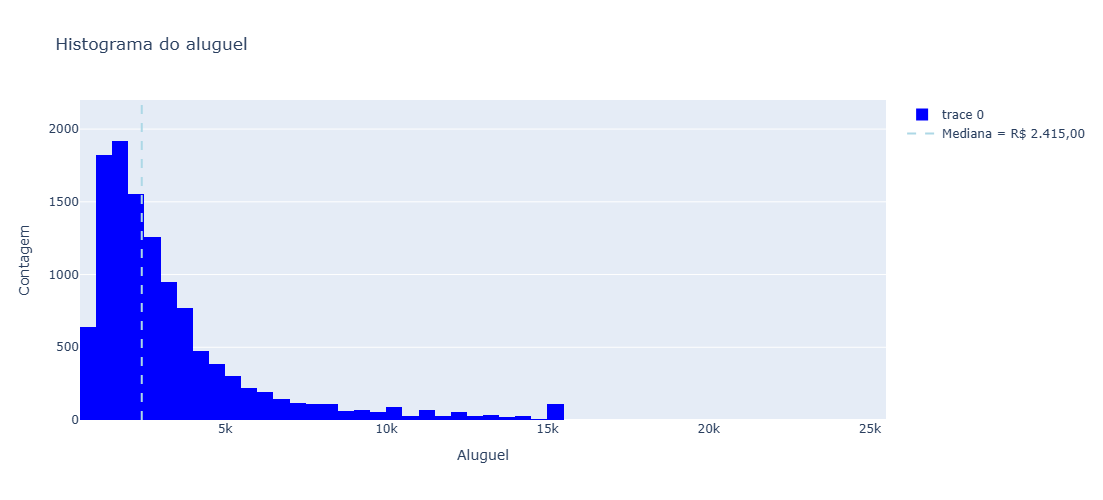

In [9]:
median_rent = aptos.rent.median()

median_rent_format = ("R$ {:,.2f}".format(median_rent).replace(',', 'v').replace('.', ',').replace('v', '.'))

data = [go.Histogram(x=aptos.rent,
                     nbinsx=50,
                     marker=dict(color='blue'))]

line = [go.Scatter(x=[median_rent, median_rent],
                   y=[0, 2200],
                   mode='lines',
                   line=dict(color='lightblue', dash='dash'),
                   showlegend=True,
                   name=f"Mediana = {median_rent_format}")]

fig = go.Figure(data=data+line)

fig.update_layout(title_text="Histograma do aluguel",
                  xaxis_title="Aluguel",
                  yaxis_title="Contagem",
                  autosize=False,
                  width=900,
                  height=500)

fig.update_yaxes(range=[0, 2200])

fig.show()          

## Explicação do código

Vou explicar cada linha deste código que cria um histograma interativo com Plotly:

### Cálculo da mediana
- **Alternativa**: `np.median(aptos['rent'])`

### Criação dos dados do histograma
```python
data = [go.Histogram(x=aptos.rent,
                     nbinsx=50,
                     marker=dict(color='blue'))]
```
- **`go.Histogram()`**: Classe do Plotly para criar histogramas
- **`x=aptos.rent`**: Dados para o eixo X (valores de aluguel)
- **`nbinsx=50`**: Número de bins (barras) do histograma
- **`marker=dict(color='blue')`**: Define a cor das barras

#### Parâmetros adicionais do Histogram
- `y=`: Dados para o eixo Y (se quiser histograma horizontal)
- `histnorm=`: Normalização ('percent', 'probability', 'density', 'probability density')
- `cumulative=dict(enabled=True)`: Histograma cumulativo
- `bingroup=`: Agrupa histogramas com o mesmo bingroup
- `opacity=`: Transparência (0-1)
- `name=`: Nome para a legenda
- `showlegend=True/False`: Mostrar/ocultar na legenda

### Criação da linha da mediana
```python
line = [go.Scatter(x=[median_rent, median_rent],
                   y=[0, 2200],
                   mode='lines',
                   line=dict(color='lightblue', dash='dash'),
                   showlegend=True,
                   name=f"Mediana = {median_rent_format}")]
```
- **`go.Scatter()`**: Classe do Plotly para gráficos de dispersão/linhas
- **`x=[median_rent, median_rent]`**: Coordenadas X (mesmo valor repetido = linha vertical)
- **`y=[0, 2200]`**: Coordenadas Y (do 0 até 2200)
- **`mode='lines'`**: Modo de exibição como linha
- **`line=dict()`**: Propriedades da linha
  - **`color='lightblue'`**: Cor da linha
  - **`dash='dash'`**: Estilo tracejado
- **`showlegend=True`**: Mostra na legenda
- **`name=f"..."`**: Nome que aparece na legenda

#### Outros estilos de linha
- `dash='solid'`: Linha sólida
- `dash='dot'`: Linha pontilhada
- `dash='dashdot'`: Linha traço-ponto
- `width=`: Espessura da linha

#### Outros modos do Scatter
- `mode='markers'`: Apenas pontos
- `mode='lines+markers'`: Linha com pontos
- `mode='text'`: Apenas texto

### Criação da figura
```python
fig = go.Figure(data=data+line)
```
- **`go.Figure()`**: Cria uma figura do Plotly
- **`data=data+line`**: Combina os dados do histograma com a linha da mediana
- **Alternativa**: `fig.add_trace()` para adicionar elementos separadamente

### Configuração do layout
```python
fig.update_layout(title_text="Histograma do aluguel",
                  xaxis_title="Aluguel",
                  yaxis_title="Contagem",
                  autosize=False,
                  width=900,
                  height=500)
```
- **`fig.update_layout()`**: Atualiza as propriedades do layout
- **`title_text=`**: Título do gráfico
- **`xaxis_title=`**: Título do eixo X
- **`yaxis_title=`**: Título do eixo Y
- **`autosize=False`**: Desabilita redimensionamento automático
- **`width=900, height=500`**: Dimensões em pixels

#### Parâmetros adicionais do layout
- `title=dict(x=0.5, font=dict(size=20))`: Centralizar e configurar fonte do título
- `font=dict(family="Arial", size=12, color="black")`: Fonte global
- `plot_bgcolor='white'`: Cor de fundo do gráfico
- `paper_bgcolor='lightgray'`: Cor de fundo da área total
- `showlegend=True/False`: Mostrar/ocultar legenda
- `legend=dict(x=0, y=1)`: Posição da legenda
- `margin=dict(l=50, r=50, t=50, b=50)`: Margens

### Configuração do eixo Y
```python
fig.update_yaxes(range=[0, 2200])
```
- **`fig.update_yaxes()`**: Atualiza propriedades do eixo Y
- **`range=[0, 2200]`**: Define o intervalo do eixo Y

#### Parâmetros adicionais dos eixos
- `tickmode='linear', tick0=0, dtick=500`: Configurar ticks personalizados
- `showgrid=True/False`: Mostrar/ocultar grade
- `gridcolor='lightgray'`: Cor da grade
- `zeroline=True/False`: Mostrar/ocultar linha do zero
- `showticklabels=True/False`: Mostrar/ocultar rótulos dos ticks

Poderíamos ir para os outros campos, certo?

Claro, até poderíamos, mas ainda há algumas coisinhas para se verificar nos custos dos imóveis, como as estatísticas descritivas:

In [10]:
aptos[['rent', 'total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


o atributo `.T` é usado para transpor matrizes ou arrays, ou seja, ele troca as linhas pelas colunas. Esse atributo é comumente utilizado em bibliotecas como NumPy e pandas.

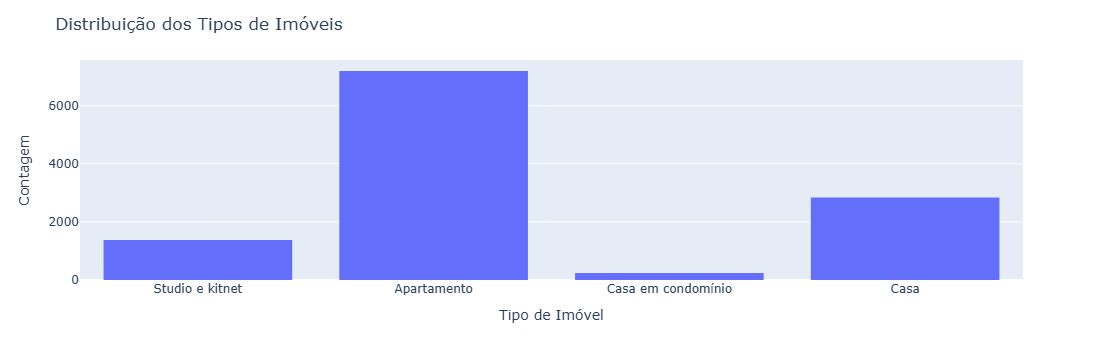

In [11]:
fig = px.histogram(aptos, x='type')
fig.update_layout(title='Distribuição dos Tipos de Imóveis',
                  xaxis_title='Tipo de Imóvel',
                  yaxis_title = 'Contagem')
fig.show()

O gráfico ficou simples, vamos jogar umas cores nas barras!

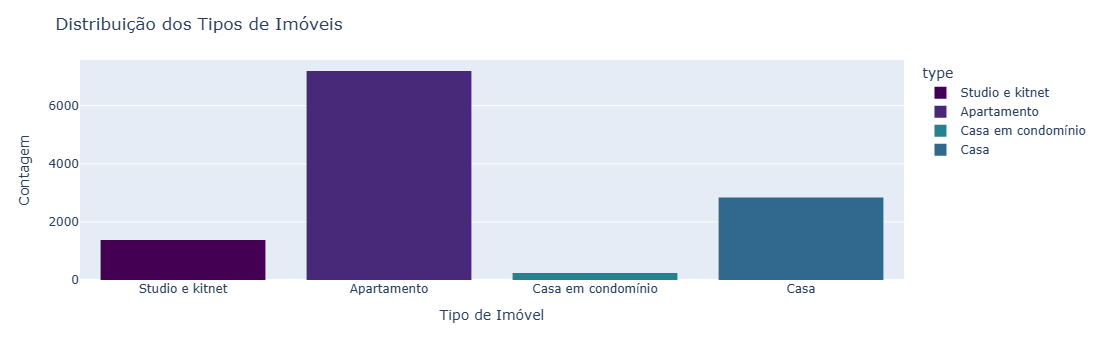

In [12]:
cores_por_tipo = {
    'Studio e kitnet': '#440154',
    'Apartamento': '#482878',
    'Casa em condomínio': '#26828e',
    'Casa': '#31688e'}

fig = px.histogram(aptos, x='type', color='type', color_discrete_map=cores_por_tipo)
fig.update_layout(title='Distribuição dos Tipos de Imóveis',
                  xaxis_title='Tipo de Imóvel',
                  yaxis_title = 'Contagem')
fig.show()

Como esperado, o número de apartamentos é muito superior aos demais. Isso é esperado numa megalópole como São Paulo. Também é importante destacar que o número de casas em condomínio é baixíssimo. Sendo essas residências mais comuns nas classes mais altas, fica nítida a desigualdade existente na cidade, algo que pudemos ver com a assimetria no histograma dos aluguéis.

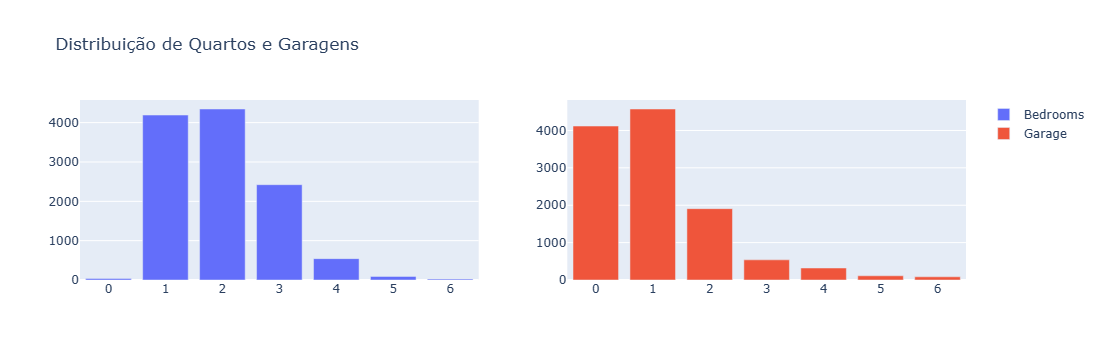

In [13]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=aptos['bedrooms'].value_counts().index,
           y=aptos['bedrooms'].value_counts().values,
           name='Bedrooms'),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=aptos['garage'].value_counts().index,
           y=aptos['garage'].value_counts().values,
           name='Garage'),
    row=1, col=2)

fig.update_layout(title='Distribuição de Quartos e Garagens')
fig.update_xaxes(tickmode='linear')

fig.show()

Para a variável, vamos explorar algumas estatísticas adicionais:

In [14]:
from tabulate import tabulate

desc = aptos['area'].describe()
desc['var'] = aptos['area'].var()
desc['kurt'] = aptos['area'].kurtosis()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers='keys', tablefmt='psql', showindex=True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+


## Explicação do código

### Importação da biblioteca
```python
from tabulate import tabulate
```
- **Função**: Importa a função `tabulate` da biblioteca `tabulate`
- **Propósito**: A função `tabulate` é usada para criar tabelas formatadas de forma elegante a partir de dados estruturados

### Estatísticas descritivas
```python
desc = aptos['area'].describe()
```
- **Parâmetros**: 
  - `percentiles=None` (padrão): Lista de percentis a incluir (padrão: [.25, .5, .75])
  - `include=None` (padrão): Tipos de dados a incluir na saída
  - `exclude=None` (padrão): Tipos de dados a excluir da saída
  - `datetime_is_numeric=False` (padrão): Trata colunas datetime como numéricas

## Adicionando variância
```python
desc['var'] = aptos['area'].var()
```
- **Função**: `var()`
- **Parâmetros**:
  - `axis=None` (padrão): Eixo ao longo do qual calcular a variância
  - `skipna=True` (padrão): Excluir valores NA/null do cálculo
  - `level=None` (padrão): Nível hierárquico específico para cálculo
  - `ddof=1` (padrão): Graus de liberdade delta (N-ddof para denominador)
  - `numeric_only=None` (padrão): Incluir apenas colunas numéricas
- **Resultado**: Adiciona o valor da variância ao Series 'desc' com a chave 'var'

### Adicionando curtose
```python
desc['kurt'] = aptos['area'].kurtosis()
```
- A curtose mede o "formato das caudas" da distribuição dos dados - se os valores extremos são frequentes ou raros.
    - Tipos de curtose:
        - **Curtose = 0 (mesocúrtica):** distribuição "normal", como uma curva de sino
        - **Curtose > 0 (leptocúrtica):** distribuição com "cauda pesada" - muitos valores extremos
        - **Curtose < 0 (platicúrtica):** distribuição com "cauda leve" - poucos valores extremos

- **Parâmetros**:
  - `axis=None` (padrão): Eixo ao longo do qual calcular a curtose
  - `skipna=True` (padrão): Excluir valores NA/null do cálculo
  - `level=None` (padrão): Nível hierárquico específico
  - `numeric_only=None` (padrão): Incluir apenas colunas numéricas
- **Resultado**: Adiciona o valor da curtose ao Series 'desc' com a chave 'kurt'

### Conversão para DataFrame
- **Parâmetros principais**:
  - `data=desc`: Os dados a serem convertidos (neste caso, o Series 'desc')
  - `index=None` (padrão): Rótulos de linha
  - `columns=None` (padrão): Rótulos de coluna
  - `dtype=None` (padrão): Tipo de dados forçado
  - `copy=False` (padrão): Fazer cópia dos dados

### Impressão formatada
```python
print(tabulate(desc, headers='keys', tablefmt='psql', showindex=True))
```
- **Função**: `tabulate()`
- **Parâmetros utilizados**:
  - `tabular_data=desc`: Os dados tabulares (DataFrame)
  - `headers='keys'`: Usa os nomes das colunas do DataFrame como cabeçalhos
  - `tablefmt='psql'`: Formato da tabela similar ao PostgreSQL (com bordas e separadores)
  - `showindex=True`: Mostra o índice das linhas na tabela

**Outros parâmetros disponíveis do tabulate():**
- `floatfmt="g"` (padrão): Formato para números decimais
- `numalign="decimal"` (padrão): Alinhamento de números
- `stralign="left"` (padrão): Alinhamento de strings
- `missingval=""` (padrão): Representação de valores ausentes
- `disable_numparse=False` (padrão): Desabilitar parsing automático de números

Com base nas estatísticas geradas, é possível observar que o <b>tamanho médio da área dos apartamentos em São Paulo é de aproximadamente 84.66 metros quadrados. No entanto, o desvio padrão é bastante alto (74.02 metros quadrados)</b>, indicando uma grande variação nos tamanhos dos apartamentos. 

Podemos notar que há alguma anomalia nos dados, já que temos um apartamento de 0 metros quadrados, algo impossível de acontecer. Isso já liga um alerta para investigar se os dados estão corretos ou se tivemos algum problema nos inputs.

Podemos ver também que a mediana é de 60 metros quadrados, o que é menor que a média, sugerindo que a distribuição dos tamanhos dos apartamentos é inclinada para a direita. Isso é confirmado pelo alto valor da curtose (8.3946), que indica a presença de outliers no lado direito da distribuição.

Além disso, a diferença entre os valores dos quartis superior e inferior (96 - 40 = 56 metros quadrados) sugere que a maior parte dos apartamentos têm áreas entre 40 e 96 metros quadrados. 

Em suma, embora a maioria dos apartamentos pareça ter entre 40 e 96 metros quadrados, há uma quantidade significativa de apartamentos que são muito menores ou muito maiores do que isso, e isso é provável que seja o resultado da presença de outliers.

Enfim, como foi dito acima, temos um problema! Não é possível apartamentos de 0 metros quadrados. Na verdade, mesmo apartamentos de 2 metros quadrados, por exemplo, seria interessante. Sendo assim, vamos verificar quantos apartamentos temos com menos de 10 metros quadrados, onde estão localizados e outras métricas que conseguirmos observar. Primeiro, a contagem:

In [15]:
print(f'Temos {aptos.query('area < 10').shape[0]} com menos de 10 metros quadrados')

Temos 7 com menos de 10 metros quadrados


In [16]:
aptos.query('area < 10')

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


Parece que há algo estranho nesses valores de metragem, poderia ser o caso da área de algumas observações estarem em diferentes unidades de medida, mas isso não explicaria os imóveis de 0 metros. Olhando os preços de aluguel, alguns estão até acima da média e da mediana. Normalmente, poderíamos acionar alguém que mexesse com as bases da empresa, ou um engenheiro de dados, ou um DBA, ou até mesmo nós, cientistas/analistas, poderíamos investigar. Aqui, não existe esta possibilidade. Sendo assim, a opção será excluir essas observações para não trazer muita sujeira para a análise, embora já seja esperado que a gente tenha problemas de qualidade dos dados.

In [17]:
aptos = aptos.query('area >= 10')

Vamos gerar uma descritiva final, para este novo dataset:

In [18]:
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11650.0,84.705408,74.014919,10.0,40.00,60.0,96.00,580.0
bedrooms,11650.0,1.966266,0.931223,0.0,1.00,2.0,3.00,6.0
garage,11650.0,1.060258,1.132394,0.0,0.00,1.0,2.00,6.0
rent,11650.0,3251.095107,2650.771522,500.0,1590.00,2415.0,3800.00,25000.0
total,11650.0,4080.398627,3352.415415,509.0,1996.25,3057.0,4774.75,28700.0


In [19]:
aptos.describe(include=["O"]).T

,count,unique,top,freq
address,11650,5344,Rua da Consolação,49
district,11650,1199,Bela Vista,352
type,11650,4,Apartamento,7193


O `include=["O"]` representa dtype='object' no pandas e inclui apenas colunas categóricas (strings, texto) e Exclui colunas numéricas (int, float) dentre outros tipos.

# Análise exploratória de ponta parte 3

Agora que já temos uma pequena noção do nosso público, vamos entender melhor os bairros que temos no dataset

In [20]:
print(f"Temos {aptos.district.nunique()} bairros na amostra.")

Temos 1199 bairros na amostra.


Quais são os bairros com o maior número de imóveis?

In [21]:
top_distritos = aptos.groupby("district").size().sort_values(ascending=False).reset_index(name='contagem')[:10]
top_distritos.columns = ['Distrito', 'Contagem']
print("Os 10 Distritos com mais Imóveis")
print(top_distritos)

Os 10 Distritos com mais Imóveis
          Distrito  Contagem
0       Bela Vista       352
1     Vila Mariana       232
2  Jardim Paulista       220
3           Centro       178
4        Pinheiros       159
5       Consolação       157
6          Santana       152
7            Mooca       147
8      Santo Amaro       146
9             Brás       141


Olha que interessante, a maior parte dos distritos são da região central (Bela Vista, Centro e Consolação), ou próximos a eles (Vila Mariana).

E quanto ao preço do aluguel? Como fica o ranking?

In [22]:
top_distritos_rent = aptos.groupby('district')['rent'].mean().sort_values(ascending=False)[:10].reset_index()
top_distritos_rent.columns = ['Distrito', 'Média do Aluguel']

top_distritos_rent['Média do Aluguel'] = top_distritos_rent['Média do Aluguel']\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel")
print(top_distritos_rent)

Top 10 Distritos com maior média de aluguel
                         Distrito Média do Aluguel
0                    Jardim Tango     R$ 15,000.00
1     Alphaville Residencial Dois     R$ 15,000.00
2     Alphaville Residencial Plus     R$ 15,000.00
3  Residencial Cinco (alphaville)     R$ 13,600.00
4       Alphaville Residencial Um     R$ 13,500.00
5              Jardim dos Estados     R$ 13,125.00
6                   Cidade Jardim     R$ 13,000.00
7                        Pacaembu     R$ 12,054.00
8                   Chácara Meyer     R$ 12,000.00
9      Centro Empresarial Tamboré     R$ 11,833.33


Há muitos distritos de Alphaville no resultado final. Vamos verificar como seria o top 10 sem Alphaville:

In [23]:
distritos_rent = aptos.groupby('district')['rent'].mean().reset_index()
distritos_rent = distritos_rent[~distritos_rent['district'].str.lower().str.contains('alphaville')]
top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:10]

top_distritos_rent.columns = ['Distrito', 'Média do Aluguel']
top_distritos_rent['Média do Aluguel'] = top_distritos_rent['Média do Aluguel']\
.apply(lambda x: "R$ {:,.2f}".format(x))

print("Top 10 Distritos com maior média de aluguel")
print(top_distritos_rent)

Top 10 Distritos com maior média de aluguel
                              Distrito Média do Aluguel
475                       Jardim Tango     R$ 15,000.00
533                 Jardim dos Estados     R$ 13,125.00
101                      Cidade Jardim     R$ 13,000.00
577                           Pacaembu     R$ 12,054.00
82                       Chácara Meyer     R$ 12,000.00
70          Centro Empresarial Tamboré     R$ 11,833.33
505  Jardim Vitoria Regia (zona Oeste)     R$ 11,820.00
248                    Jardim Cordeiro     R$ 11,250.00
85               Chácara Santo Antônio     R$ 10,650.00
83                Chácara Monte Alegre     R$ 10,205.00


Para facilitar o leitor, vamo usar um gráfico de barras:

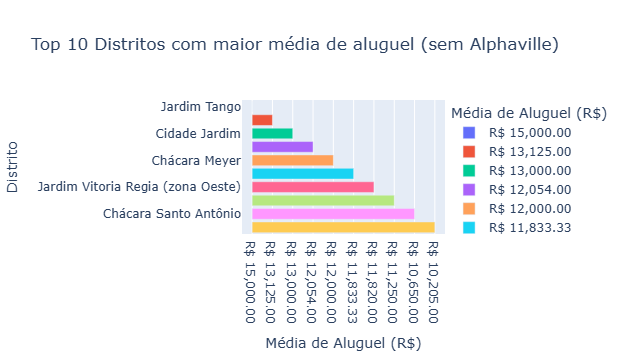

In [30]:
fig = px.bar(top_distritos_rent,
             y='Distrito',
             x='Média do Aluguel',
             orientation='h',
             title='Top 10 Distritos com maior média de aluguel (sem Alphaville)',
             labels={'Média do Aluguel': 'Média de Aluguel (R$)', 'Distrito': 'Distrito'},
             color='Média do Aluguel')

fig.update_yaxes(autorange='reversed')
fig.show()

In [25]:
distritos_rent.describe()

,rent
count,1188.000000
mean,2617.220994
std,1761.963806
min,500.000000
25%,1498.350000
50%,2085.500000
75%,3101.968750
max,15000.000000


Antes de mais nada, podemos ver que existe uma distância relevante entre o primeiro e o 10º bairro do ranking, sendo que o Jardim Tango tem uma média de aluguel próxima de 1,5x a média da Chácara Monte Alegre. Olhando somente para o top 10, um público já bastante restrito, temos um desvio padrão de R$1.761,96 - valor considerável para um grupo tão pequeno.

Vejamos a distribuição dos bairros com imóveis mais caros, de acordo com as zonas:
- Zona Leste: Jardim Tango
- Zona Oeste: Pacaembu, Jardim Vitória Régia, Centro Empresarial Tamboré
- Zona Sul: Jardim dos Estados, Cidade Jardim, Chácara Meyer, Jardim Cordeiro, Chácara Santo Antônio, Chácara Monte Alegre

Em outras palavras, a Zona Sul é onde há imóveis mais caros da cidade, seguido da Zona Oeste, Leste e Norte. Entretanto, há diversos contrastes sociais na cidade. Sabemos, por exemplo, que a região central é uma das mais requisitadas, ainda que não tenhamos nenhum bairro no top 10. 
Adicionalmente, é importante pontuar sempre a variância enorme em cada bairro, já que a zona Sul temos bairros de classes altas, mas também diversos bairros onde predominam moradores de renda mais baixa, como a famosa favela Paraisópolis - que, além de tudo, tem fronteira com os luxuosos condomínios Jardim Vitória Régia, Paço dos Reis e Portal do Morumbi.

O que achou dos comentários? Dava para escrever mais? Já vai pensando no que você faria!

Seu portfólio só será chamativo se você não resumir seus materiais a apresentar os dados, mas também fazer considerações. Neste momento, você tem meio que uma janela de oportunidade, um local para mostrar ao leitor - seja ele um colega de profissão, ou um gestor que está recrutando para sua equipe - o que você é capaz de gerar de valor, o quanto você consegue inferir dos dados e até correr atrás de mais informações para tirar algum insight interessante. Lembre-se sempre que seu portfólio é a oportunidade de você demonstrar também seus conhecimentos gerais e sua proatividade, então não precisa limitar os comentários ao que está no dataset.

Antes de explorarmos mais dos top 10, é de se imaginar que o leitor deste estudo também queira entender o top 10 dos bairros com aluguéis mais baratos. Afinal, é legal saber o que tem no top 10 mais caros, mas isso é mais interessante quando temos um comparativo (perfil dos baratos x perfil dos caros). Sendo assim, nada mais óbvio do que também gerar o top 10 dos mais baratos:

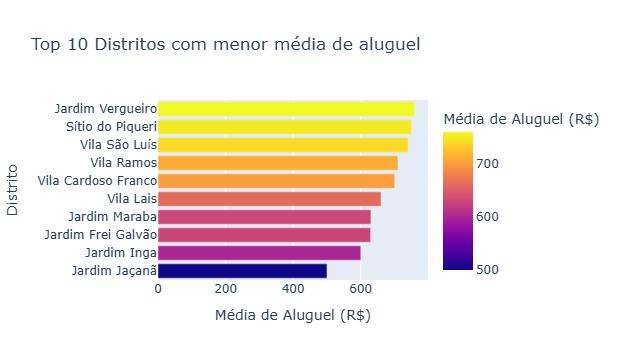

In [28]:
bottom_distritos_rent = distritos_rent.sort_values('rent', ascending=True)[:10]
bottom_distritos_rent = bottom_distritos_rent.sort_values('rent', ascending=False)

bottom_distritos_rent.columns = ["Distrito", "Média de Aluguel"]

fig = px.bar(bottom_distritos_rent,
             y='Distrito',
             x='Média de Aluguel',
             orientation='h',
             title='Top 10 Distritos com menor média de aluguel',
             labels={'Média de Aluguel':'Média de Aluguel (R$)', 'Distrito':'Distrito'},
             color='Média de Aluguel')

fig.update_yaxes(autorange='reversed')
fig.show()

In [31]:
bottom_distritos_rent.describe()

,Média de Aluguel
count,10.000000
mean,667.850000
std,80.888143
min,500.000000
25%,629.250000
50%,680.250000
75%,732.500000
max,759.000000


Novamente, vamos olhar por zonas:
- Zona Leste: Vila Cardoso Franco, Vila Lais, Jardim Frei Galvão
- Zona Oeste: Vila São Luís, Vila Ramos
- Zona Sul: Jardim Verqueiro, Jardim Maraba, Jardim Inga
- Zona Norte: Sítio do Piquerí, Jardim Jaçanã

Podemos ver que a distribuição mudou bastante, sendo que a Zona Leste aparece com maior presença neste ranking, algo que já é esperado, pois é o local mais periférico de São Paulo. Como destaque para a desigualdade, vemos que a Zona Sul também aparece no ranking, como a 2º zona mais presente.

Vemos que aqui a dispersão também é bem alta, com o desvio padrão ficando de 81 reais, para um grupo onde a média dos aluguéis é de apenas R$ 667,85.

Agora, seria interessante destrinchar melhor como essa desigualdade ocorre, olhando para os detalhes dos imóveis. Entretanto, um top 10 me parece uma amostra muito pequena para uma análise robusta. Vamos utilizar pelo menos um n = 50:

In [32]:
# 50 bairros mais caros (excluindo Alphaville)
top_distritos_rent = distritos_rent.sort_values('rent', ascending=False)[:50]
top_distritos_rent.columns = ['Distrito', 'Média de Aluguel']
top_aptos = aptos[aptos['district'].isin(top_distritos_rent['Distrito'])]

# 50 bairros mais baratos
bottom_distritos_rent = distritos_rent.sort_values('rent', ascending=True)[:50]
bottom_distritos_rent.columns = ['Distrito', 'Média de Aluguel']
bottom_aptos = aptos[aptos['district'].isin(bottom_distritos_rent['Distrito'])]

display(top_aptos.head()), display(bottom_aptos.head())

,address,district,area,bedrooms,garage,type,rent,total
105,Rua Oscar Freire,Cerqueira César,55,2,0,Apartamento,3950,5097
179,Rua Padre Lebret,Jardim Leonor,87,1,2,Apartamento,4500,6010
200,Rua Camargo Aranha,Pacaembu,350,4,2,Casa,10400,11660
249,Rua Pamplona,Cerqueira César,49,1,1,Apartamento,3000,3967
278,Rua Augusta,Cerqueira César,35,1,1,Apartamento,2800,3661


,address,district,area,bedrooms,garage,type,rent,total
219,Rua Adele Zarzur,Jardim São José (zona Norte),50,1,0,Casa,850,887
489,Rua das Águias Reais,Vila Cardoso Franco,50,2,1,Apartamento,791,1212
538,Rua Celeste Fernandes Dalphorno,Jardim Rosana,40,1,0,Casa,800,949
639,Rua Ulisses Paschoal,Jardim Lourdes (zona Sul),15,1,0,Studio e kitnet,882,1009
1005,Rua Amorim Castro,Vila São Luís,15,1,0,Studio e kitnet,740,1196


(None, None)

Pronto, agora podemos comparar os imóveis! Primeiro, vamos checar o quão distantes são os valores de aluguel:

C:\Users\55329\AppData\Local\Temp\ipykernel_11380\2545619235.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\55329\AppData\Local\Temp\ipykernel_11380\2545619235.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



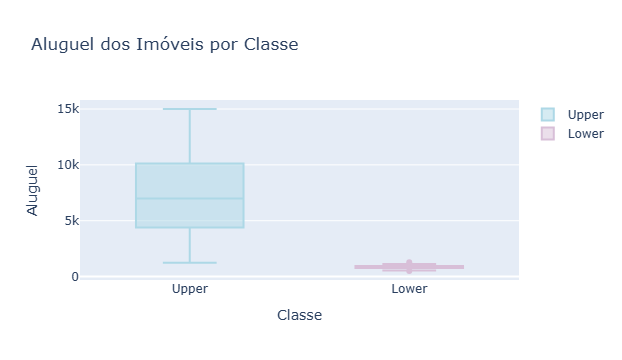

In [34]:
top_aptos['class'] = 'Upper'
bottom_aptos['class'] = 'Lower'

fig = go.Figure()

fig.add_trace(go.Box(
    x=top_aptos['class'],
    y=top_aptos['rent'],
    name='Upper',
    boxpoints='outliers',
    marker_color='lightblue'))

fig.add_trace(go.Box(
    x=bottom_aptos['class'],
    y=bottom_aptos['rent'],
    name='Lower',
    boxpoints='outliers',
    marker_color='thistle'))

fig.update_layout(xaxis=dict(title='Classe'),
                  yaxis=dict(title='Aluguel'),
                  title='Aluguel dos Imóveis por Classe',
                  showlegend=True)

fig.show()


E quando olhamos por tipo de imóvel?

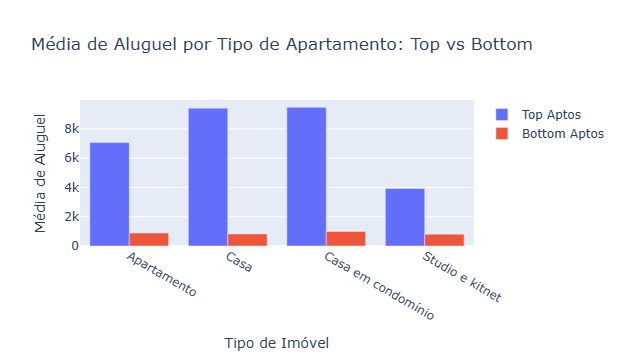

In [36]:
rent_by_type_top = top_aptos.groupby('type')['rent'].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby('type')['rent'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top['type'],
    y=rent_by_type_top['rent'],
    name='Top Aptos'))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom['type'],
    y=rent_by_type_bottom['rent'],
    name='Bottom Aptos'))

fig.update_layout(
    title='Média de Aluguel por Tipo de Apartamento: Top vs Bottom',
    xaxis_title='Tipo de Imóvel',
    yaxis_title='Média de Aluguel')

fig.show()


Podemos ver que a distância dos vlores de aluguel dos studios e kitnets não chegam a ser tão distantes quanto os das casas. De certa forma, é esperado que um studio num bairro nobre seja mais caro somente pela localização, já que o tamanho não consegue expandir. Por outro lado, a casa pode ser valorizada tanto pela localização, quanto pela estrutura, fazendo o preço subir até 10x mais.

Inclusive, podemos validar isso olhando a área dos imóveis:

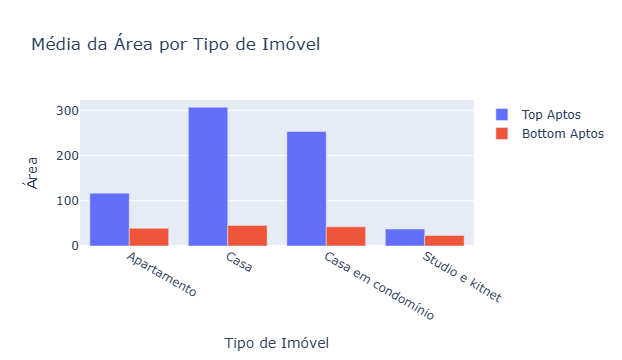

In [37]:
rent_by_type_top = top_aptos.groupby('type')['area'].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby('type')['area'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rent_by_type_top['type'],
    y=rent_by_type_top['area'],
    name='Top Aptos'))

fig.add_trace(go.Bar(
    x=rent_by_type_bottom['type'],
    y=rent_by_type_bottom['area'],
    name='Bottom Aptos'))

fig.update_layout(
    title='Média da Área por Tipo de Imóvel',
    xaxis_title='Tipo de Imóvel',
    yaxis_title='Área')

fig.show()


Como havíamos cogitado, a diferença do tamanho das casas de bairros de diferentes classes sociais é bem maior que a diferença no tamanho de apartamentos, studios e kitnets. Isso explica a diferença no preço ser muito mais agressiva.